# Loading data

## Loading training set

In [24]:
import os
import os.path
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

def load_train_data():
    core_path = os.environ['GITHUB_PATH']
    file_path = os.path.join(core_path, 'education/kaggle/house-prices-advanced-regression-techniques/train.csv')

    return pd.read_csv(file_path)

housing = load_train_data()

## Loading test set

In [25]:
def load_test_data():
    core_path = os.environ['GITHUB_PATH']
    file_path = os.path.join(core_path, 'education/kaggle/house-prices-advanced-regression-techniques/test.csv')

    return pd.read_csv(file_path)

housing_test = load_test_data()

In [26]:
# housing_test.info()

In [27]:
test_na_columns = housing_test.columns[housing_test.isna().any()].tolist()

In [28]:
train_na_columns = housing.columns[housing.isna().any()].tolist()

In [29]:
# list(set(test_na_columns) - set(train_na_columns))

# Investigation of data

In [30]:
# housing.info()

In [31]:
corr_matrix = housing.corr()
# corr_matrix["SalePrice"].sort_values(ascending=False)

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))
# plt.show()

# Test set

In [33]:
# On the one hand we can divide training set to 2 parts as if it's real contest with closed test set
# On the other hand we loss data and our train set is already "train", so we can use it whole.

# from sklearn.model_selection import train_test_split

# random_train_set, random_test_set = train_test_split(housing, test_size=0.2, random_state=42)



# Copy of data

In [34]:
housing_train = housing.drop(columns=['SalePrice'])
housing_y = housing['SalePrice']
# housing_train = random_train_set.copy()
# housing_train.info()

# NA filling

In [35]:
housing.columns[housing.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## NA mapper

In [36]:
#https://www.mikulskibartosz.name/preprocessing-the-input-pandas-dataframe-using-columntransformer-in-scikit-learn/
from sklearn.impute import SimpleImputer 
from sklearn_pandas import DataFrameMapper, gen_features
from collections import Iterable

def get_column_names(features):
    names = []
    for f in features:
        col = f[0]
        if isinstance(col, Iterable):
            for v in col:
                names.append(v)
        else:
            names.append(col)
    return names

def add_imputer(features, column_names, imputer_dict):
    columns_2d = [[a] for a in column_names]
    feature_def = gen_features(
        columns=columns_2d,
        classes=[imputer_dict]
    )
    for f in feature_def:
        features.append(f)
        
def get_pass_columns(df, features, to_remove_list):
    gen_column_names = get_column_names(features)

    all_columns_list = df.columns.values.tolist()
    pass_coumns = list(set(all_columns_list) - 
                   (set(gen_column_names) | set(to_remove_list)))
    return pass_coumns

def add_pass_imputer(features, columns):
    pass_feature_def = gen_features(
        columns=columns,
        classes=[None]
    )
    for f in pass_feature_def:
        features.append(f)

na_to_none_columns_text = """
Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
"""

na_to_none_columns = na_to_none_columns_text.split()

na_to_mode_columns = [
    'Electrical',
    'MSZoning',
    'Functional',
    'KitchenQual',
    'Utilities',
    'SaleType',
    'Exterior1st',
    'Exterior2nd'
]
na_to_zero_columns = [
    'MasVnrArea',
    'BsmtFinSF2',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageArea',
    'TotalBsmtSF',
    'GarageCars',
    'BsmtFinSF1',
    'BsmtUnfSF'
]
na_to_mean_columns = [
    'LotFrontage'
]

to_be_removed = ['GarageYrBlt']
        
all_fixed_features = []
add_imputer(all_fixed_features, na_to_mode_columns,
           {'class': SimpleImputer, 'strategy': 'most_frequent'})
add_imputer(all_fixed_features, na_to_none_columns,
           {'class': SimpleImputer, 'strategy': 'constant', 'fill_value': 'None'})
add_imputer(all_fixed_features, na_to_zero_columns,
           {'class': SimpleImputer, 'strategy': 'constant', 'fill_value': 0.0})
add_imputer(all_fixed_features, na_to_mean_columns,
           {'class': SimpleImputer, 'strategy': 'mean'})
    

# gen_column_names = get_column_names(all_fixed_features)

# all_columns_list = housing_train.columns.values.tolist()
# pass_coumns = list(set(all_columns_list) - 
#                    (set(gen_column_names) | set(to_be_removed)))

pass_columns = get_pass_columns(housing_train, all_fixed_features, to_be_removed)
add_pass_imputer(all_fixed_features, pass_columns)
# pass_feature_def = gen_features(
#     columns=pass_coumns,
#     classes=[None]
# )

# for f in pass_feature_def:
#     all_fixed_features.append(f)


na_mapper = DataFrameMapper(all_fixed_features, df_out=True)



# na_to_none_columns_2d
# column_names = pd.Index(na_preprocessor.get_feature_names())
# column_names
# housing_wo_na = pd.DataFrame(housing_wo_na_array, index=housing.index, columns=housing.columns)

# housing_wo_na.columns[housing_wo_na.isna().any()].tolist()

### Train data NA filling

In [37]:
housing_wo_na_df = na_mapper.fit_transform(housing_train)
housing_wo_na_df.columns[housing_wo_na_df.isna().any()].tolist()

[]

### Test data NA filling

In [38]:
housing_test_wo_na_df = na_mapper.fit_transform(housing_test)
housing_test_wo_na_df.columns[housing_test_wo_na_df.isna().any()].tolist()

[]

# Features investigation and engineering 1

In [39]:
housing_research_df = housing_wo_na_df.copy()
housing_research_df['SalePrice'] = housing['SalePrice']

## Distrubutions

## Price

### Histogram

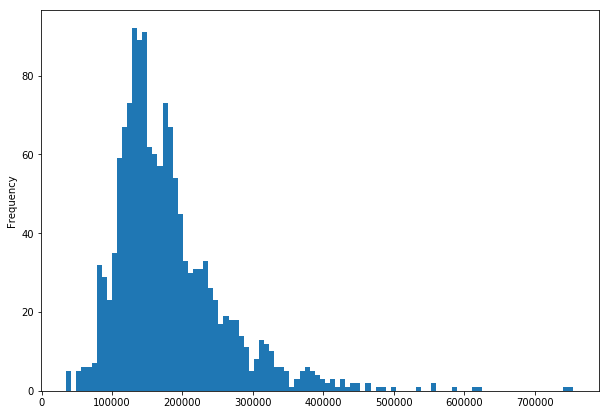

In [40]:
housing_research_df['SalePrice'].plot.hist(bins=100, figsize=(10,7))
plt.show()

In [41]:
print('Price mean = {0}, std = {1}'.format(
    housing_research_df['SalePrice'].mean(),
    housing_research_df['SalePrice'].std()))

Price mean = 180921.19589041095, std = 79442.50288288663


In [42]:
prices = housing_research_df["SalePrice"]
print('q05 = {0}, q95 = {1}'.format(prices.quantile(0.05), prices.quantile(0.95)))

q05 = 88000.0, q95 = 326099.99999999994


### Box plot

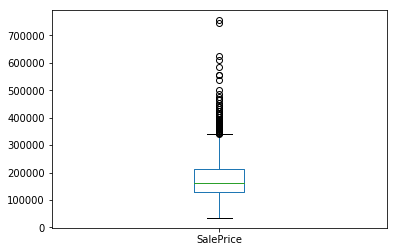

In [43]:
housing_research_df['SalePrice'].plot.box()

### OverallQual

In [44]:
import numpy as np
stat = housing_research_df[['SalePrice', 'OverallQual']].groupby('OverallQual').agg(['count', np.mean, np.std])
stat.sort_values(('SalePrice','mean'))

SalePrice                              
                count           mean            std
OverallQual                                        
1                   2   50150.000000   15344.217152
2                   3   51770.333333   14254.200796
3                  20   87473.750000   24688.567399
4                 116  108420.655172   29022.003886
5                 397  133523.347607   27107.330927
6                 374  161603.034759   36090.182933
7                 319  207716.423197   44466.259414
8                 168  274735.535714   63898.902253
9                  43  367513.023256   81278.174849
10                 18  438588.388889  159785.491058

In [45]:
OverallQual_fixed = stat[('SalePrice','mean')][housing_research_df['OverallQual']]/100000.0
# OverallQual_fixed.reset_index()
housing_research_df['OverallQualFixed'] = OverallQual_fixed.values
# housing_research_df[['OverallQual', 'OverallQualFixed']]

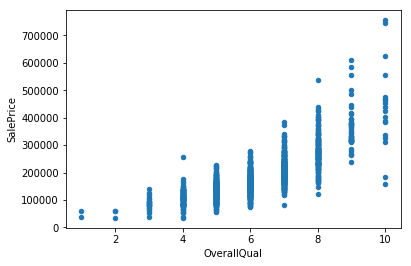

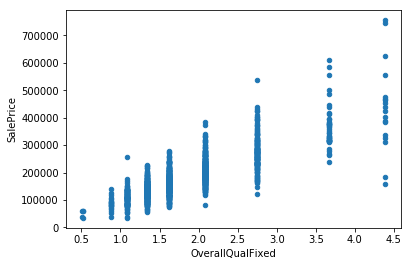

In [46]:
housing_research_df.plot.scatter(x='OverallQual', y='SalePrice')
housing_research_df.plot.scatter(x='OverallQualFixed', y='SalePrice')

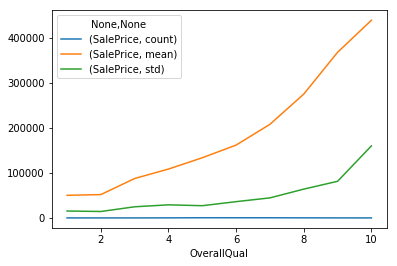

In [47]:
stat.plot()

### Neighborhood

In [48]:
housing_research_df[['SalePrice', 'Neighborhood']].groupby('Neighborhood').agg(['count', np.mean, np.std]).sort_values(('SalePrice','mean'))

SalePrice                              
                 count           mean            std
Neighborhood                                        
MeadowV             17   98576.470588   23491.049610
IDOTRR              37  100123.783784   33376.710117
BrDale              16  104493.750000   14330.176493
BrkSide             58  124834.051724   40348.689270
Edwards            100  128219.700000   43208.616459
OldTown            113  128225.300885   52650.583185
Sawyer              74  136793.135135   22345.129157
Blueste              2  137500.000000   19091.883092
SWISU               25  142591.360000   32622.917679
NPkVill              9  142694.444444    9377.314529
NAmes              225  145847.080000   33075.345450
Mitchel             49  156270.122449   36486.625334
SawyerW             59  186555.796610   55651.997820
NWAmes              73  189050.068493   37172.218106
Gilbert             79  192854.506329   35986.779085
Blmngtn             17  194870.882353   30393.229219
CollgCr            150  197965.773333   51403.666438
Crawfor             51  210624.725490   68866.395472
ClearCr             28  212565.428571   50231.538993
Somerst             86  225379.837209   56177.555888
Veenker             11  238772.727273   72369.317959
Timber              38  242247.447368   64845.651549
StoneBr             25  310499.000000  112969.676640
NridgHt             77  316270.623377   96392.544954
NoRidge             41  335295.317073  121412.658640

### New feature - mean price for Neighborhood and correlation with price

So we see that there are:
1. cheep ares (MeadowV - BrDale)
2. econom (BrkSide - Mitchel)
3. comfort (SawyerW - Timber)
4. elite (StoneBr - NoRidge)

We can get mean price for each category and calc correlation with sale price

In [49]:
neighborhood_cat_columns = [
    ['MeadowV', 'IDOTRR', 'BrDale'],
    ['BrkSide', 'Edwards', 'OldTown'],
    ['Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel'],
    ['SawyerW', 'NWAmes', 'Gilbert', 'Blmngtn', 'CollgCr'],
    ['Crawfor', 'ClearCr', 'Somerst', 'Veenker', 'Timber'],
    ['StoneBr', 'NridgHt', 'NoRidge']]

def create_neighborhood_cat_feature(df, columns_array):
    df['NeighborhoodCat'] = 0.0
    for cols in columns_array:
            m = df[df['Neighborhood'].isin(cols)]['SalePrice'].mean()
            df['NeighborhoodCat'][df['Neighborhood'].isin(cols)] = int(m / 1000)

create_neighborhood_cat_feature(housing_research_df, neighborhood_cat_columns)
# housing_research_df['NeighborhoodCat']

In [50]:
housing_research_df[['OverallQual', 'Neighborhood']].groupby('Neighborhood').agg([np.mean, np.std]).sort_values(('OverallQual','mean'))

OverallQual          
                    mean       std
Neighborhood                      
MeadowV         4.470588  0.624264
IDOTRR          4.756757  1.140307
Sawyer          5.027027  0.522716
BrkSide         5.051724  1.190937
Edwards         5.080000  1.307940
NAmes           5.360000  0.823321
OldTown         5.389381  1.291688
SWISU           5.440000  1.083205
Mitchel         5.591837  0.864059
BrDale          5.687500  0.478714
ClearCr         5.892857  0.994030
NPkVill         6.000000  0.000000
Blueste         6.000000  0.000000
Crawfor         6.274510  1.021341
SawyerW         6.322034  0.936624
NWAmes          6.328767  0.727530
Gilbert         6.556962  0.780316
CollgCr         6.640000  1.038067
Veenker         6.727273  1.348400
Timber          7.157895  1.197437
Blmngtn         7.176471  0.392953
Somerst         7.337209  0.806014
NoRidge         7.926829  0.848241
StoneBr         8.160000  0.687992
NridgHt         8.259740  0.992108

## Grouping by some categories

### Whole square
What we should do with unfinished squares? I think we should multiply it by some coef, so we should find coef somehow?

In [51]:
square_columns = ['LotArea', 'MasVnrArea', 'TotalBsmtSF',
                  'GrLivArea', 'GarageArea']

housing_research_df[square_columns].mean()

LotArea        10516.828082
MasVnrArea       103.117123
TotalBsmtSF     1057.429452
GrLivArea       1515.463699
GarageArea       472.980137
dtype: float64

In [52]:
housing_research_df['TotalArea'] = housing_research_df['GrLivArea'] + 0.3*housing_research_df['TotalBsmtSF']

### Price of 1 square feet

In [53]:
housing_research_df['PricePerGrLivArea'] = housing_research_df['SalePrice'] / housing_research_df['GrLivArea']
housing_research_df['PricePerTotalArea'] = housing_research_df['SalePrice'] / housing_research_df['TotalBsmtSF']
housing_research_df[['PricePerGrLivArea', 'Neighborhood']].groupby('Neighborhood').agg(['count', np.mean, np.std])

PricePerGrLivArea                       
                         count        mean        std
Neighborhood                                         
Blmngtn                     17  136.566974  16.442328
Blueste                      2   98.969369   2.723305
BrDale                      16   91.950543  10.905571
BrkSide                     58  105.966809  20.956996
ClearCr                     28  124.242989  35.154804
CollgCr                    150  136.783680  19.856032
Crawfor                     51  120.254826  29.602103
Edwards                    100  101.832958  28.562907
Gilbert                     79  119.114931  19.241586
IDOTRR                      37   89.136043  27.466568
MeadowV                     17  101.926201  27.986732
Mitchel                     49  126.017449  27.885001
NAmes                      225  116.089385  23.084300
NPkVill                      9  116.726891  17.977999
NWAmes                      73  111.848349  18.391293
NoRidge                     41  132.271687  21.780224
NridgHt                     77  164.578057  31.545375
OldTown                    113   91.427282  25.983022
SWISU                       25   84.755233  21.558536
Sawyer                      74  117.856163  25.553172
SawyerW                     59  119.704424  22.114151
Somerst                     86  141.335966  24.247865
StoneBr                     25  165.402275  35.922454
Timber                      38  139.766483  28.914709
Veenker                     11  154.980914  32.661473

In [54]:
housing_research_df[['PricePerGrLivArea', 'OverallQual']].groupby('OverallQual').agg(['count', np.mean, np.std])

PricePerGrLivArea                       
                        count        mean        std
OverallQual                                         
1                           2   92.571273  35.487423
2                           3   95.183628  36.209290
3                          20   79.895426  18.226795
4                         116  102.401838  27.501554
5                         397  112.746779  28.009558
6                         374  114.346688  24.654341
7                         319  124.494470  23.350210
8                         168  144.511059  30.583341
9                          43  178.693921  28.847131
10                         18  160.423437  54.158179

### Mean area of room

In [55]:
housing_research_df['GrLivAreaPerRoom'] = housing_research_df['GrLivArea'] / housing_research_df['TotRmsAbvGrd'] 

## Year

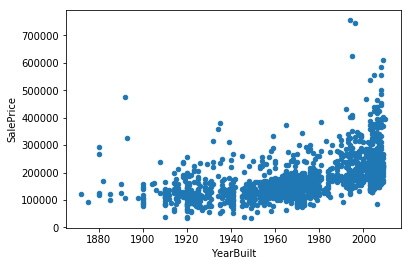

In [56]:
housing_research_df.plot.scatter(x='YearBuilt', y='SalePrice')

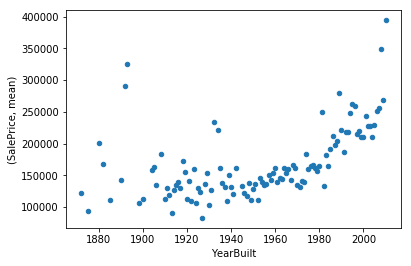

In [57]:
stat = housing_research_df[['SalePrice', 'YearBuilt']].groupby('YearBuilt').agg(['count', np.mean, np.std]).sort_values(('SalePrice','mean'))
# stat.plot.scatter(x=stat.index, y=('SalePrice','mean'))
# stat.plot(style='.')
stat.reset_index().plot.scatter(x='YearBuilt', y=('SalePrice','mean'))
# stat.columns
# stat.index

In [58]:
housing_research_df['YearRemodAdd'].min()

1950

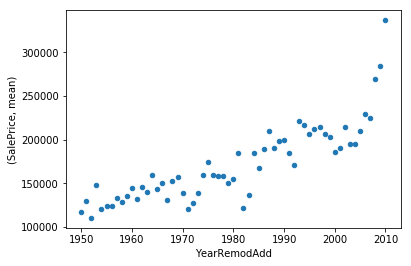

In [59]:
stat = housing_research_df[['SalePrice', 'YearRemodAdd']].groupby('YearRemodAdd').agg(['count', np.mean, np.std]).sort_values(('SalePrice','mean'))
stat.reset_index().plot.scatter(x='YearRemodAdd', y=('SalePrice','mean'))

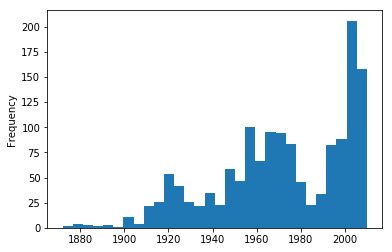

In [60]:
housing_research_df['YearBuilt'].plot.hist(bins=30)

I think you need split to:
1.     - 1979
2. 1980-1999
2. 2000-now

In [61]:
year = housing_research_df['YearBuilt']
housing_research_df['YearBuilt2D'] = year.copy()
housing_research_df['YearBuilt2D'][year < 1980]=1
housing_research_df['YearBuilt2D'][year > 1979]=2

In [62]:
year = housing_research_df['YearBuilt']
housing_research_df['YearBuilt3D'] = year.copy()
housing_research_df['YearBuilt3D'][year < 1980]=1
housing_research_df['YearBuilt3D'][(year > 1979) & (year < 1990)]=1.5
housing_research_df['YearBuilt3D'][year > 1989]=2

In [63]:
year = housing_research_df['YearBuilt']
housing_research_df['YearBuilt5D'] = year.copy()
housing_research_df['YearBuilt5D'][year < 1920]=1
housing_research_df['YearBuilt5D'][(year > 1919) & (year < 1941)]=2
housing_research_df['YearBuilt5D'][(year > 1940) & (year < 1980)]=3
housing_research_df['YearBuilt5D'][(year > 1979) & (year < 2000)]=4
housing_research_df['YearBuilt5D'][(year > 1999)]=5

In [64]:
year = housing_research_df['YearRemodAdd']
housing_research_df['YearRemodAdd4D'] = year.copy()
housing_research_df['YearRemodAdd4D'][year < 1980]=1
housing_research_df['YearRemodAdd4D'][(year > 1979) & (year < 1990)]=2
housing_research_df['YearRemodAdd4D'][(year > 1989) & (year < 2000)]=3
housing_research_df['YearRemodAdd4D'][(year > 1999)]=4

### Subclass

In [65]:
housing_research_df[['SalePrice', 'MSSubClass']].groupby('MSSubClass').agg(['count', np.mean, np.std]).sort_values(('SalePrice','mean'))

SalePrice                              
               count           mean            std
MSSubClass                                        
30                69   95829.724638   24857.110083
180               10  102300.000000   29474.282575
45                12  108591.666667   20231.723889
190               30  129613.333333   35439.097670
90                52  133541.076923   27833.249197
160               63  138647.380952   34587.542266
50               144  143302.972222   54851.983707
85                20  147810.000000   19629.942220
40                 4  156125.000000   75747.799748
70                60  166772.416667   58206.545762
80                58  169736.551724   38197.808771
20               536  185224.811567   78782.189967
75                16  192437.500000  100556.762577
120               87  200779.080460   58221.490909
60               299  239948.501672   86579.909966

### Subclass categories

30,180,45

190,90,160,50,85,40

70,80

20,75,120

60

In [66]:
classes = [
    ['30', '180', '45'],
    ['190','90','160','50','85','40'],
    ['70', '80'],
    ['20', '75', '120'],
    ['60']
]

def calc_subclass_categories(df, classes=classes):
    values = []
    for vals in classes:
        stat = df[df['MSSubClass'].isin(vals)]['SalePrice'].agg(['count', np.mean, np.std])
        print('count = {0}, mean={1}, std={2}\n'.format(stat['count'], stat['mean'], stat['std']))
        values.append(int(stat['mean'] / 1000.0))
    return values

def create_subclass_category_feature(df, name='MSSubClassCat', classes=classes):
    df[name] = np.nan
    values = calc_subclass_categories(df, classes)
    for feature_vals, val in zip(classes, values):
        print('feature_vals={0}, val = {1}'.format(feature_vals, val))
        df[name][df['MSSubClass'].isin(feature_vals)] = val
    
# values = calc_subclass_categories(housing_research_df)
# values
create_subclass_category_feature(housing_research_df)

# For some reason first option is OK:
# housing_research_df['MSSubClassCat'][housing_research_df['MSSubClass'].isin(classes[0])] = 98.0
# and second is NOT!:
# housing_research_df[housing_research_df['MSSubClass'].isin(classes[0])]['MSSubClassCat'] = 98.0

# housing_research_df['MSSubClassCat']

count = 91.0, mean=98223.63736263737, std=24986.275787816212

count = 313.0, mean=139883.8626198083, std=44370.01391196959

count = 118.0, mean=168229.36440677967, std=49208.98826098227

count = 639.0, mean=187523.12832550862, std=76995.36911622675

count = 299.0, mean=239948.5016722408, std=86579.90996572845

feature_vals=['30', '180', '45'], val = 98
feature_vals=['190', '90', '160', '50', '85', '40'], val = 139
feature_vals=['70', '80'], val = 168
feature_vals=['20', '75', '120'], val = 187
feature_vals=['60'], val = 239


## MasVnrTypeCat

In [67]:
def create_subclass_category_feature(df, name='MasVnrTypeCat'):
    zero_classes = ['BrkCmn', 'None']
    df[name] = 1.0
    df[name][df['MasVnrType'].isin(zero_classes)] = 0.0

create_subclass_category_feature(housing_research_df)

## BsmtExposureCat

In [68]:
# values is dict (cat_va1, cat_val2, ...): num_val
def create_category_dic_feature(df, name, orig_name, values):
    df[name] = np.nan
    for k, v in values.items():
        df[name][df[orig_name].isin(k)] = v

bsmt_values = {('None',): 10.0, ('No',): 16.5, ('Mn', 'Av'): 20.0, ('Gd',): 25.7}
create_category_dic_feature(housing_research_df, 'BsmtExposureCat', 'BsmtExposure', bsmt_values)

## 3 features (location, size, quality)

In [69]:
housing_research_df[['NeighborhoodCat', 'GrLivArea']].groupby('NeighborhoodCat').agg(['count', np.mean, np.std])

GrLivArea                         
                    count         mean         std
NeighborhoodCat                                   
100.0                  70  1122.257143  316.911760
127.0                 271  1368.970480  581.719908
145.0                 384  1320.960938  429.409870
193.0                 378  1577.375661  418.775487
223.0                 214  1692.350467  415.098024
320.0                 143  2079.496503  571.216664

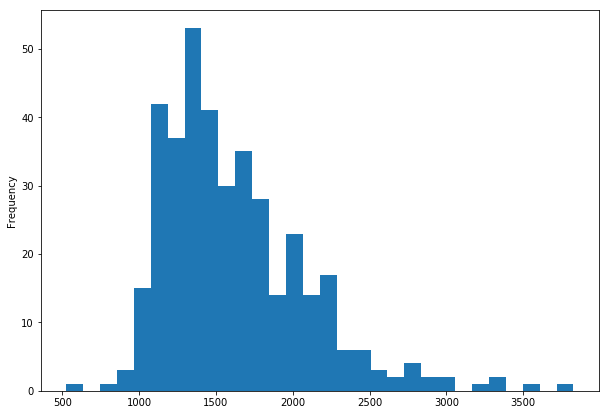

In [70]:
# housing_research_df[housing_research_df['NeighborhoodCat'] == 145.0]['GrLivArea'].plot.hist(bins=30, figsize=(10,7))
housing_research_df[housing_research_df['NeighborhoodCat'] == 145.0]['TotalArea'].plot.hist(bins=30, figsize=(10,7))
plt.show()

In [71]:
housing_research_df[(housing_research_df['NeighborhoodCat'] == 145.0) &
                    (housing_research_df['GrLivArea'] > 1000) & (housing_research_df['GrLivArea'] < 1200) &
                   (housing_research_df['OverallQual'] == 5) & (housing_research_df['Fireplaces'] == 1)].sort_values('SalePrice')
# [['Id', 'Neighborhood', 'SalePrice', 'GrLivArea', 'Fireplaces', 'HouseStyle', 'LotArea', 'MSSubClass', 'BsmtFinSF1', 'MasVnrArea', 'GarageArea', 'GarageFinish', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'SaleCondition', 'Exterior1st', 'KitchenQual', 'LotConfig']]

,Electrical,MSZoning,Functional,KitchenQual,Utilities,SaleType,Exterior1st,Exterior2nd,Alley,MasVnrType,...,PricePerGrLivArea,PricePerTotalArea,GrLivAreaPerRoom,YearBuilt2D,YearBuilt3D,YearBuilt5D,YearRemodAdd4D,MSSubClassCat,MasVnrTypeCat,BsmtExposureCat
733,SBrkr,RL,Typ,TA,AllPub,WD,HdBoard,HdBoard,None,None,...,114.860140,152.083333,190.666667,1,1.0,3,2,187.0,0.0,16.5
816,SBrkr,RL,Typ,TA,AllPub,WD,BrkFace,BrkFace,None,None,...,135.912698,135.912698,252.000000,1,1.0,3,1,187.0,0.0,16.5
116,SBrkr,RL,Typ,TA,AllPub,WD,Wd Sdng,Wd Sdng,None,BrkFace,...,127.289377,127.289377,182.000000,1,1.0,3,1,187.0,1.0,16.5
556,FuseA,RL,Typ,TA,AllPub,WD,Wd Sdng,Wd Sdng,None,None,...,129.120879,129.120879,182.000000,1,1.0,3,1,187.0,0.0,16.5
419,SBrkr,RL,Typ,TA,AllPub,WD,VinylSd,VinylSd,None,None,...,134.469697,134.469697,176.000000,1,1.0,3,1,187.0,0.0,16.5
946,SBrkr,RL,Typ,TA,AllPub,WD,HdBoard,HdBoard,None,BrkFace,...,125.000000,125.000000,190.666667,1,1.0,3,1,168.0,1.0,20.0
485,SBrkr,RL,Typ,Gd,AllPub,WD,MetalSd,MetalSd,None,None,...,132.075472,132.075472,222.600000,1,1.0,3,4,187.0,0.0,16.5
1357,SBrkr,RL,Typ,TA,AllPub,WD,VinylSd,VinylSd,None,None,...,139.053803,139.053803,179.666667,1,1.0,3,4,187.0,0.0,16.5
24,SBrkr,RL,Typ,Gd,AllPub,WD,Plywood,Plywood,None,None,...,145.283019,145.283019,176.666667,1,1.0,3,4,187.0,0.0,20.0
1064,SBrkr,RL,Typ,TA,AllPub,WD,Plywood,Plywood,None,BrkFace,...,133.448873,133.448873,192.333333,1,1.0,3,1,187.0,1.0,20.0


So we see for example 2 houses:

805	NAmes	118000	1128

1065	NAmes	154000	1154

They have the same Neighborhood and GrLivArea but what is difference?

Seems important:
Fireplaces
BsmtExposure
MasVnrType
GarageCars
GarageFinish ?
MasVnrArea ?
BsmtFullBath ? (BsmtFullBath + BsmtHalfBath)?
GarageArea ?
WoodDeckSF ?
FullBath ?
HouseStyle ?
OverallCond ??

In [72]:
old_max_columns = pd.options.display.max_columns
pd.options.display.max_columns = None
housing_research_df[(housing_research_df.Id == 805) | (housing_research_df.Id == 1065)]

,Electrical,MSZoning,Functional,KitchenQual,Utilities,SaleType,Exterior1st,Exterior2nd,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,MasVnrArea,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,GarageArea,TotalBsmtSF,GarageCars,BsmtFinSF1,BsmtUnfSF,LotFrontage,LandSlope,Neighborhood,HouseStyle,FullBath,Foundation,LandContour,OverallQual,3SsnPorch,Fireplaces,OverallCond,BedroomAbvGr,KitchenAbvGr,HalfBath,RoofStyle,MoSold,LowQualFinSF,Street,LotConfig,MSSubClass,ExterCond,2ndFlrSF,HeatingQC,OpenPorchSF,TotRmsAbvGrd,Condition1,Condition2,MiscVal,CentralAir,YearBuilt,EnclosedPorch,ScreenPorch,BldgType,WoodDeckSF,GrLivArea,ExterQual,PavedDrive,YearRemodAdd,PoolArea,Heating,YrSold,LotShape,1stFlrSF,RoofMatl,LotArea,Id,SaleCondition,SalePrice,OverallQualFixed,NeighborhoodCat,TotalArea,PricePerGrLivArea,PricePerTotalArea,GrLivAreaPerRoom,YearBuilt2D,YearBuilt3D,YearBuilt5D,YearRemodAdd4D,MSSubClassCat,MasVnrTypeCat,BsmtExposureCat
804,SBrkr,RL,Min1,TA,AllPub,WD,Wd Sdng,Wd Sdng,None,None,TA,TA,No,LwQ,Unf,None,Attchd,Unf,TA,TA,None,GdWo,None,0.0,0,0,0,286,936,1,812,124,75.000000,Gtl,NAmes,1Story,1,CBlock,Lvl,5,0,0,5,2,1,0,Gable,6,0,Pave,Inside,20,TA,0,TA,0,5,Norm,Norm,0,Y,1954,0,0,1Fam,0,1128,TA,Y,1954,0,GasA,2006,Reg,1128,CompShg,9000,805,Family,118000,1.335233,145.0,1408.8,104.609929,126.068376,225.600000,1,1.0,3,1,187.0,0.0,16.5
1064,SBrkr,RL,Typ,TA,AllPub,WD,Plywood,Plywood,None,BrkFace,TA,TA,Mn,BLQ,Rec,Po,Attchd,RFn,TA,TA,None,MnPrv,None,200.0,230,0,0,480,1154,2,740,184,70.049958,Gtl,NAmes,1Story,1,CBlock,Lvl,5,0,1,6,3,1,1,Gable,11,0,Pave,CulDSac,20,TA,0,Ex,58,6,Norm,Norm,0,Y,1966,0,0,1Fam,0,1154,TA,Y,1966,0,GasA,2009,IR1,1154,CompShg,11000,1065,Normal,154000,1.335233,145.0,1500.2,133.448873,133.448873,192.333333,1,1.0,3,1,187.0,1.0,20.0


For investigation
MSSubClass
HouseStyle - !

In [73]:
housing_research_df[(housing_research_df.Id == 1419) | (housing_research_df.Id == 1291)]
# diff = housing_research_df[(housing_research_df.Id == 1419)].values == housing_research_df[(housing_research_df.Id == 1291)].values
# housing_research_df[(housing_research_df.Id == 1419)]

,Electrical,MSZoning,Functional,KitchenQual,Utilities,SaleType,Exterior1st,Exterior2nd,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,MasVnrArea,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,GarageArea,TotalBsmtSF,GarageCars,BsmtFinSF1,BsmtUnfSF,LotFrontage,LandSlope,Neighborhood,HouseStyle,FullBath,Foundation,LandContour,OverallQual,3SsnPorch,Fireplaces,OverallCond,BedroomAbvGr,KitchenAbvGr,HalfBath,RoofStyle,MoSold,LowQualFinSF,Street,LotConfig,MSSubClass,ExterCond,2ndFlrSF,HeatingQC,OpenPorchSF,TotRmsAbvGrd,Condition1,Condition2,MiscVal,CentralAir,YearBuilt,EnclosedPorch,ScreenPorch,BldgType,WoodDeckSF,GrLivArea,ExterQual,PavedDrive,YearRemodAdd,PoolArea,Heating,YrSold,LotShape,1stFlrSF,RoofMatl,LotArea,Id,SaleCondition,SalePrice,OverallQualFixed,NeighborhoodCat,TotalArea,PricePerGrLivArea,PricePerTotalArea,GrLivAreaPerRoom,YearBuilt2D,YearBuilt3D,YearBuilt5D,YearRemodAdd4D,MSSubClassCat,MasVnrTypeCat,BsmtExposureCat
1290,SBrkr,RL,Typ,TA,AllPub,WD,Wd Sdng,HdBoard,None,BrkFace,TA,TA,Av,GLQ,Unf,Gd,Attchd,RFn,TA,TA,None,None,None,86.0,0,1,0,484,1152,2,1014,138,70.049958,Gtl,NAmes,SLvl,1,PConc,Lvl,5,0,1,7,3,1,0,Hip,4,0,Pave,Corner,80,TA,0,TA,0,6,Norm,Norm,0,Y,1964,0,0,1Fam,227,1152,TA,Y,1964,0,GasA,2010,IR1,1152,CompShg,14112,1291,Normal,180500,1.335233,145.0,1497.6,156.684028,156.684028,192.000000,1,1.0,3,1,168.0,1.0,20.0
1418,SBrkr,RL,Typ,TA,AllPub,COD,HdBoard,HdBoard,None,None,TA,TA,No,BLQ,Rec,None,Detchd,Unf,TA,TA,None,None,None,0.0,872,1,0,336,1144,1,25,247,71.000000,Gtl,NAmes,1Story,1,CBlock,Lvl,5,0,0,5,3,1,1,Gable,8,0,Pave,Inside,20,TA,0,TA,88,6,Norm,Norm,0,Y,1963,0,0,1Fam,0,1144,TA,Y,1963,0,GasA,2008,Reg,1144,CompShg,9204,1419,Normal,124000,1.335233,145.0,1487.2,108.391608,108.391608,190.666667,1,1.0,3,1,187.0,0.0,16.5


## Narrow data correlation
Correlation in near similar locations and similar total area

In [74]:
location_145_similar_area = housing_research_df[(housing_research_df['NeighborhoodCat'] == 145.0) &
                    (housing_research_df['TotalArea'] > 1300) & (housing_research_df['TotalArea'] < 1600)]

In [75]:
len(location_145_similar_area)

111

In [76]:
corr_145_research = location_145_similar_area.corr()
corr_res = corr_145_research['SalePrice'].abs().sort_values(ascending=False)
# corr_res

In [77]:
corr_res

SalePrice            1.000000
PricePerGrLivArea    0.800894
GarageCars           0.473604
OverallQualFixed     0.414991
OverallQual          0.412908
GarageArea           0.386989
MasVnrTypeCat        0.373933
MasVnrArea           0.360302
PricePerTotalArea    0.339708
OverallCond          0.314438
BsmtExposureCat      0.299057
YearBuilt            0.289797
TotalArea            0.267371
MSSubClass           0.250589
WoodDeckSF           0.244181
FullBath             0.221256
BsmtFullBath         0.221212
YearRemodAdd         0.217239
BsmtFinSF1           0.212530
BsmtUnfSF            0.208622
GrLivArea            0.186262
PoolArea             0.180211
TotRmsAbvGrd         0.170524
Fireplaces           0.162190
OpenPorchSF          0.129050
HalfBath             0.107637
TotalBsmtSF          0.101023
YrSold               0.095386
YearBuilt3D          0.091458
BsmtHalfBath         0.089575
ScreenPorch          0.075072
1stFlrSF             0.070863
EnclosedPorch        0.068479
YearRemodA

### Other locations

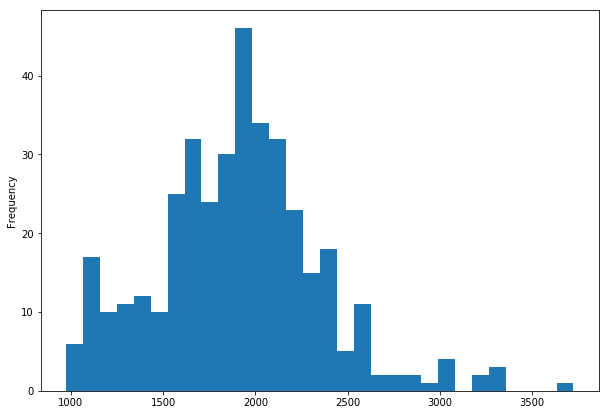

In [78]:
housing_research_df[housing_research_df['NeighborhoodCat'] == 193.0]['TotalArea'].plot.hist(bins=30, figsize=(10,7))
plt.show()

In [79]:
location_193_similar_area = housing_research_df[(housing_research_df['NeighborhoodCat'] == 193.0) &
                    (housing_research_df['TotalArea'] > 1800) & (housing_research_df['TotalArea'] < 2200)]
len(location_193_similar_area)

150

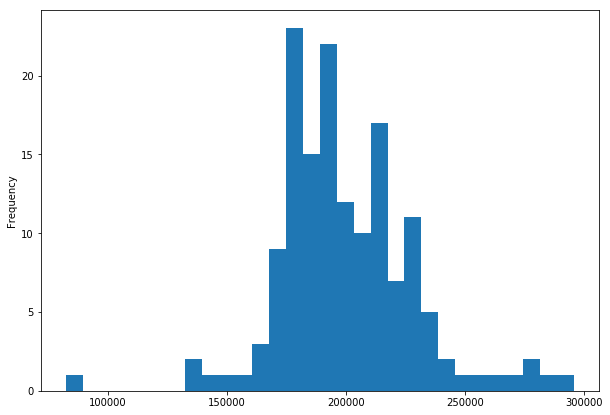

In [80]:
location_193_similar_area['SalePrice'].plot.hist(bins=30, figsize=(10,7))
plt.show()

In [81]:
location_193_similar_area[['OverallQual', 'SalePrice']].groupby('OverallQual').agg(['count', np.mean, np.std])

SalePrice                             
                count           mean           std
OverallQual                                       
5                   7  161792.142857  26204.726650
6                  45  187154.444444  14682.320933
7                  85  203540.800000  26567.359783
8                  12  232246.166667  33748.080880
9                   1  285000.000000           NaN

In [82]:
location_193_area_qual_7 = location_193_similar_area[location_193_similar_area['OverallQual'] == 7]
len(location_193_area_qual_7)

85

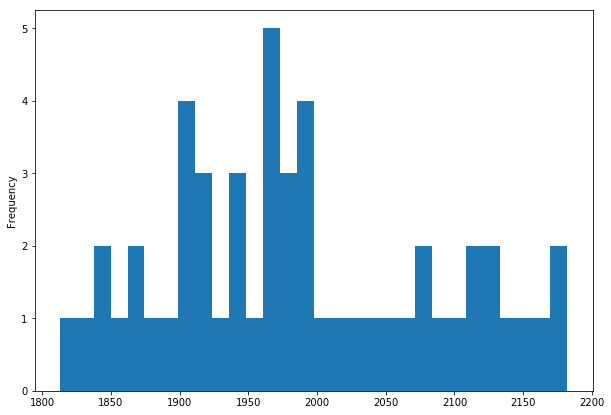

In [83]:
location_193_area_qual_7[location_193_area_qual_7['YearBuilt5D'] == 5]['TotalArea'].plot.hist(bins=30, figsize=(10,7))
plt.show()

In [84]:
location_193_area_qual_7[['YearBuilt5D', 'SalePrice']].groupby('YearBuilt5D').agg(['count', np.mean, np.std])

SalePrice                             
                count           mean           std
YearBuilt5D                                       
3                   7  163042.857143  38859.269900
4                  26  201671.153846  19124.989794
5                  52  209927.269231  23175.581646

In [85]:
location_193_area_qual_7_year5 = location_193_area_qual_7[location_193_area_qual_7['YearBuilt5D'] == 5]
location_193_area_qual_7_year5_corr = location_193_area_qual_7_year5.corr()
corr = location_193_area_qual_7_year5_corr['SalePrice'].abs().sort_values(ascending=False)
corr

SalePrice            1.000000e+00
PricePerGrLivArea    7.476920e-01
BsmtFullBath         4.962853e-01
TotalArea            4.774394e-01
BsmtFinSF1           4.324658e-01
GarageArea           3.854934e-01
GarageCars           3.568904e-01
LotFrontage          3.549670e-01
BsmtExposureCat      3.283339e-01
LotArea              3.128640e-01
MasVnrArea           3.086915e-01
BsmtUnfSF            2.868445e-01
BedroomAbvGr         2.847649e-01
MSSubClass           2.624551e-01
YrSold               2.431114e-01
GrLivArea            2.171420e-01
PricePerTotalArea    2.165136e-01
BsmtHalfBath         2.076003e-01
MoSold               1.853231e-01
TotalBsmtSF          1.795918e-01
Fireplaces           1.750486e-01
OverallCond          1.651707e-01
1stFlrSF             1.329839e-01
3SsnPorch            1.240336e-01
OpenPorchSF          1.114327e-01
WoodDeckSF           1.069354e-01
GrLivAreaPerRoom     1.031972e-01
YearBuilt            9.661916e-02
YearRemodAdd         7.350568e-02
TotRmsAbvGrd  

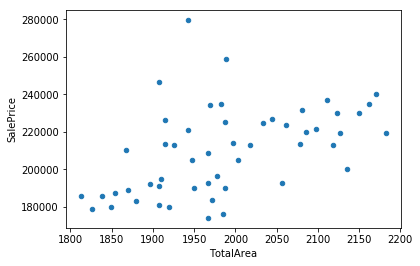

In [86]:
location_193_area_qual_7_year5.plot.scatter(x='TotalArea', y='SalePrice')

In [87]:
location_193_area_qual_7_year5['SalePrice'].mean()

209927.26923076922

In [88]:
location_193_area_qual_7_corr = location_193_area_qual_7.corr()
location_193_area_qual_7_corr['SalePrice'].abs().sort_values(ascending=False)

SalePrice            1.000000e+00
PricePerGrLivArea    8.174330e-01
YearBuilt2D          4.593631e-01
BsmtFullBath         4.423024e-01
YearBuilt5D          4.262572e-01
YearBuilt            4.069279e-01
TotalArea            4.061362e-01
YearBuilt3D          4.019536e-01
YearRemodAdd         3.993666e-01
YearRemodAdd4D       3.939556e-01
BsmtExposureCat      3.550166e-01
GarageArea           3.421424e-01
GarageCars           3.276244e-01
BsmtFinSF1           3.166938e-01
TotalBsmtSF          2.161359e-01
GrLivAreaPerRoom     1.953664e-01
PricePerTotalArea    1.890403e-01
MoSold               1.855194e-01
YrSold               1.648850e-01
BsmtUnfSF            1.644263e-01
MasVnrArea           1.405147e-01
LotArea              1.390513e-01
FullBath             1.385655e-01
1stFlrSF             1.377916e-01
GrLivArea            1.348224e-01
BsmtHalfBath         1.287727e-01
OpenPorchSF          1.140068e-01
ScreenPorch          9.310343e-02
LotFrontage          9.240697e-02
MSSubClass    

In [89]:
location_193_similar_area_corr = location_193_similar_area.corr()
corr_res = location_193_similar_area_corr['SalePrice'].abs().sort_values(ascending=False)
corr_res

SalePrice            1.000000
PricePerGrLivArea    0.862287
OverallQualFixed     0.547214
OverallQual          0.539088
YearBuilt            0.485394
YearBuilt5D          0.481121
YearRemodAdd         0.468784
GarageArea           0.461388
YearRemodAdd4D       0.456730
GarageCars           0.455159
BsmtFullBath         0.452607
YearBuilt3D          0.429438
BsmtExposureCat      0.427176
YearBuilt2D          0.422063
TotalArea            0.378331
BsmtFinSF1           0.357921
TotalBsmtSF          0.306705
KitchenAbvGr         0.302740
BedroomAbvGr         0.216065
1stFlrSF             0.180871
MiscVal              0.180378
GrLivAreaPerRoom     0.176863
MSSubClass           0.154837
OverallCond          0.152778
HalfBath             0.146010
PricePerTotalArea    0.138775
OpenPorchSF          0.130865
2ndFlrSF             0.124293
BsmtUnfSF            0.116190
TotRmsAbvGrd         0.105940
WoodDeckSF           0.100885
MasVnrTypeCat        0.092599
Id                   0.071401
MoSold    

### Some research

In [90]:
# location_145_similar_area[['SalePrice', 'MasVnrType']].groupby('MasVnrType').agg(['count', np.mean, np.std]).sort_values(('SalePrice','mean'))

In [91]:
housing_research_df[['SalePrice', 'BsmtExposure']].groupby('BsmtExposure').agg(['count', np.mean, np.std]).sort_values(('SalePrice','mean'))

SalePrice                              
                 count           mean            std
BsmtExposure                                        
None                38  107938.342105   32133.440664
No                 953  165652.295908   60695.724915
Mn                 114  192789.657895   77335.442652
Av                 221  206643.420814   88655.504849
Gd                 134  257689.805970  118923.672583

# Clustering

In [126]:
from sklearn.cluster import MeanShift, estimate_bandwidth

clustering_df = housing_research_df[['TotalArea', 'NeighborhoodCat', 'YearBuilt5D', 'OverallQual']]
clustering_df['TotalArea'] = clustering_df['TotalArea'] / 100.0
X = clustering_df.values
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(clustering_df))

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=22.540287919998878, bin_seeding=True, cluster_all=True,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [93]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 6


In [102]:
(labels == 5).sum()

1

In [144]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=50, n_init=10)
km = kmeans.fit(X)

labels = km.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [151]:
def add_rmean_prices(df, labels, print_stat=False):
    df['KMeanPrice'] = np.nan
    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)
    prices = [0]*n_clusters
    for i in range(n_clusters):
        stat = df['SalePrice'][(labels == i)].agg(['count', np.mean, np.std])
        df['KMeanPrice'][(labels == i)] = stat['mean']
        prices[i] = stat['mean']
        if print_stat:
            print('label = {0}, std = {1}, count = {2}, mean = {3}'.format(i, stat['std'], stat['count'], stat['mean']))
    return prices

In [ ]:
add_rmean_prices(housing_research_df, labels)

In [131]:
def rmsle_(y, y0, **kwargs):
    assert(len(y) == len(y0))
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))

rmsle_(housing_research_df['KMeanPrice'].values, housing_research_df['SalePrice'].values)


0.17482416805991732

In [157]:
from sklearn.model_selection import train_test_split

km_columns = ['TotalArea', 'NeighborhoodCat', 'YearBuilt5D', 'OverallQual']

def prepare_kmean_df(df):
    df['TotalArea'] = df['TotalArea'] / 100.0

def estimate_kmean_regressor(df, columns, prepare_func=prepare_kmean_df, test_size=0.3):
    km_train_df, km_test_df = train_test_split(df, test_size=test_size, random_state=42)
    clustering_train_df = km_train_df[columns]
    prepare_kmean_df(clustering_train_df)

    kmeans = KMeans(init='k-means++', n_clusters=50, n_init=10)
    km = kmeans.fit(clustering_train_df.values)

    km_prices = add_rmean_prices(km_train_df, km.labels_)
    
    clustering_test_df = km_test_df[columns]
    prepare_kmean_df(clustering_test_df)

    res = km.predict(clustering_test_df.values)
    
    km_predict_prices = np.zeros(len(km_test_df))
    for i in range(len(km_predict_prices)):
        km_predict_prices[i] = km_prices[res[i]]
    return rmsle_(km_predict_prices, km_test_df['SalePrice'].values)

estimate_kmean_regressor(housing_research_df, km_columns)

0.18132581670142178

In [165]:
def prepare_kmean_df2(df):
    df['TotalArea'] = df['TotalArea'] / 100.0

km_columns2 = ['TotalArea', 'NeighborhoodCat', 'YearBuilt5D', 'OverallQual', 'GarageCars']
estimate_kmean_regressor(housing_research_df, km_columns2, test_size=0.3, prepare_func=prepare_kmean_df2)

0.18154803840576397

## Classification on price categories

### 2*std data frame

In [603]:
prices = housing_research_df['SalePrice']
housing_research_2std_df = housing_research_df[((prices - prices.mean()) / prices.std()).abs() < 2]

## Error estimation

In [297]:
mean_price = housing_research_df['SalePrice'].mean()
mean_prices = np.zeros(housing_research_df['SalePrice'].count(), dtype=np.float)
mean_prices = mean_prices + mean_price

np.random.seed(42)

def calc_rmsle_of_normal_error(prices, error_mean, error_std):
    num = len(prices)
    s = np.random.normal(error_mean, error_std, num)
    s = prices + s
    s[s < 0.0] = 0.0
    return np.sqrt(np.mean(np.square(np.log1p(prices) - np.log1p(s))))

mean_price = housing_research_df['SalePrice'].mean()
real_prices = housing_research_df['SalePrice'].values
calc_rmsle_of_normal_error(real_prices, 0.0, 26850.0)

0.22750071386912388

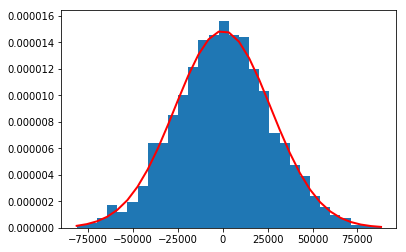

In [305]:
sigma = 26850.0
submission1_err_norm = np.random.normal(0.0, sigma, len(real_prices))
count, bins, ignored = plt.hist(submission1_err_norm, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - 0.0)**2 / (2 * sigma**2) ),
    linewidth=2, color='r')
plt.show()

## Correlation

In [604]:
corr_matrix_research = housing_research_2std_df.corr()
corr_res = corr_matrix_research['SalePrice'].abs().sort_values(ascending=False)

In [605]:
corr_res

SalePrice            1.000000
OverallQual          0.783845
OverallQualFixed     0.782780
NeighborhoodCat      0.709348
TotalArea            0.708954
GrLivArea            0.658776
GarageCars           0.628007
GarageArea           0.605193
YearBuilt3D          0.603397
YearBuilt2D          0.595893
FullBath             0.575091
YearBuilt            0.564087
YearBuilt5D          0.563211
MSSubClassCat        0.550566
TotalBsmtSF          0.543039
YearRemodAdd         0.541174
GrLivAreaPerRoom     0.537061
1stFlrSF             0.522614
YearRemodAdd4D       0.505168
PricePerGrLivArea    0.484648
TotRmsAbvGrd         0.472401
Fireplaces           0.453116
PricePerTotalArea    0.380599
MasVnrTypeCat        0.370860
MasVnrArea           0.347531
OpenPorchSF          0.320799
2ndFlrSF             0.313211
WoodDeckSF           0.304571
BsmtExposureCat      0.303411
LotFrontage          0.295823
BsmtFinSF1           0.292534
HalfBath             0.279628
LotArea              0.249519
BsmtUnfSF 

## OHE mapper

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_attribs = list(housing_wo_na_df.select_dtypes(['object']).columns)
cat_attribs_2d = [[a] for a in cat_attribs]

cat_attribs_feature_def = gen_features(
    columns=cat_attribs_2d,
    classes=[{'class': OneHotEncoder, 'sparse': False}]
)

cat_mapper = DataFrameMapper(cat_attribs_feature_def, df_out=True, default=None)


### Train OHE transform

In [18]:
housing_ohe_df = cat_mapper.fit_transform(housing_wo_na_df)
# housing_ohe_df.columns

### Test OHE transform

In [19]:
housing_test_ohe_df = cat_mapper.fit_transform(housing_test_wo_na_df)

## Train data scaling and normalization

In [321]:
from sklearn.preprocessing import StandardScaler

train_numeric_columns = list(set(housing_train.select_dtypes(include=[np.number]).columns) & set(housing_ohe_df.columns))
train_numeric_columns_2d = [[a] for a in train_numeric_columns]
train_numeric_feature_def = gen_features(
    columns=train_numeric_columns_2d,
    classes=[{'class': StandardScaler}]
)

num_mapper = DataFrameMapper(train_numeric_feature_def, df_out=True, default=None)
train_scaled_df = num_mapper.fit_transform(housing_ohe_df)
# tran_scaled_df

## Test data scaling and normalization

In [322]:
test_numeric_columns = list(set(housing_test.select_dtypes(include=[np.number]).columns) & set(housing_test_ohe_df.columns))
test_numeric_columns_2d = [[a] for a in test_numeric_columns]
test_numeric_feature_def = gen_features(
    columns=test_numeric_columns_2d,
    classes=[{'class': StandardScaler}]
)

test_num_mapper = DataFrameMapper(test_numeric_feature_def, df_out=True, default=None)
test_scaled_df = test_num_mapper.fit_transform(housing_test_ohe_df)
# tran_scaled_df

## Selecting by correlation

In [427]:
def select_columns_by_corr(df, y, threshold=0.2):
    df_and_y = df.copy()
    df_and_y['SalePrice'] = housing_y

    corr_matrix = df_and_y.corr()
    corr_res = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
    columns = corr_res.index[corr_res.values>threshold].values
    return df_and_y[np.delete(columns, columns == 'SalePrice')]


housing_train_corr_sel_df = select_columns_by_corr(train_scaled_df, housing_y, 0.3)
housing_train_x = housing_train_corr_sel_df.copy()
housing_train_y = housing_y

housing_train_corr_sel_df['SalePrice'] = housing_y
# housing_train_x
#     features = 
# housing_prepared_corr = housing_prepared_df_and_y[features]
# housing_train_x = housing_prepared_df_and_y[features].drop(columns=['SalePrice'])
# housing_train_y = housing_prepared_df_and_y['SalePrice']
# housing_data_x.info()
# corr_res

In [481]:
housing_train_x.columns

Index(['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'ExterQual_x0_TA', 'FullBath', 'BsmtQual_x0_Ex', 'TotRmsAbvGrd',
       'YearBuilt', 'KitchenQual_x0_TA', 'YearRemodAdd', 'KitchenQual_x0_Ex',
       'Foundation_x0_PConc', 'MasVnrArea', 'FireplaceQu_x0_None',
       'Fireplaces', 'ExterQual_x0_Gd', 'BsmtQual_x0_TA', 'ExterQual_x0_Ex',
       'BsmtFinType1_x0_GLQ', 'HeatingQC_x0_Ex', 'GarageFinish_x0_Fin',
       'GarageFinish_x0_Unf', 'Neighborhood_x0_NridgHt', 'BsmtFinSF1',
       'MasVnrType_x0_None', 'SaleType_x0_New', 'GarageType_x0_Detchd',
       'SaleCondition_x0_Partial', 'Foundation_x0_CBlock', 'FireplaceQu_x0_Gd',
       'GarageType_x0_Attchd', 'LotFrontage', 'MasVnrType_x0_Stone',
       'Neighborhood_x0_NoRidge', 'WoodDeckSF', 'KitchenQual_x0_Gd',
       '2ndFlrSF', 'OpenPorchSF', 'HeatingQC_x0_TA', 'BsmtExposure_x0_Gd',
       'Exterior2nd_x0_VinylSd', 'Exterior1st_x0_VinylSd'],
      dtype='object')

In [487]:
housing_wo_na_df[(housing_wo_na_df['BsmtQual'] == 'Ex')].Id.count()

121

## RMSLE

In [63]:
# https://stackoverflow.com/a/47623068/3663499
# https://www.kaggle.com/jpopham91/rmlse-vectorized
def rmsle(y, y0, **kwargs):
    assert(len(y) == len(y0))
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))

## First simple model for first glance

In [428]:
X = housing_train_x.values
y = housing_train_y.values

In [429]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

tree_reg = DecisionTreeRegressor()
rmsle_scorer = make_scorer(rmsle)

scores = cross_val_score(tree_reg, X, y,
                         scoring=rmsle_scorer, cv=10)
print(np.mean(scores))

0.22451736092851982


## Checking on random test set

In [425]:
def check_model_test(model, train_set, size, rnd_state=42):
    train_df, test_df = train_test_split(train_set, test_size=size, random_state=rnd_state)
    test_x = test_df.drop(columns=['SalePrice'])
    X =  train_df.drop(columns=['SalePrice'])
    y = train_df['SalePrice']
    
    model.fit(X, y)
    return (model.predict(test_x), test_df['SalePrice'])

temp_model = DecisionTreeRegressor()
pred_prices, prices = check_model_test(temp_model, housing_train_corr_sel_df, 0.3)
# pred_prices
rmsle(pred_prices, prices)

0.23442217062094553

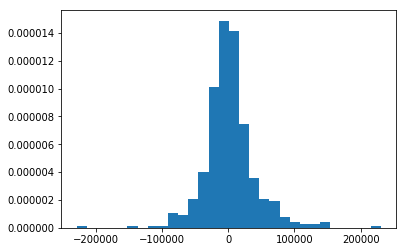

In [353]:
errors = prices - pred_prices
count, bins, ignored = plt.hist(errors, 30, density=True)
plt.show()

In [348]:
def print_mean_and_std(data):
    print('mean = {0}, std = {1}'.format(data.mean(), data.std()))

In [349]:
print_mean_and_std(errors)

mean = 1427.052511415525, std = 40605.502355830045


In [350]:
calc_rmsle_of_normal_error(prices, 1427.0, 40605.5)

0.2828224882093645

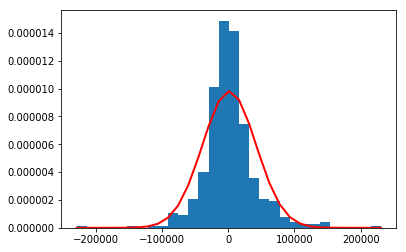

In [354]:
mo = 1427.0
sigma = 40605.5
errors = prices - pred_prices
count, bins, ignored = plt.hist(errors, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mo)**2 / (2 * sigma**2) ),
    linewidth=2, color='r')
plt.show()

### Overfitted model

In [426]:
forest_reg_best = RandomForestRegressor(bootstrap=False, n_estimators=50, max_features=8)
pred_prices, prices = check_model_test(forest_reg_best, housing_train_corr_sel_df, 0.3, 312)
# pred_prices
rmsle(pred_prices, prices)

0.15200031538457176

### Test data preparation
We keep only columns with good correlation

In [372]:
housing_test_X = test_scaled_df[housing_train_x.columns].values

### Predict on test data

In [375]:
tree_reg_first_model = DecisionTreeRegressor()

tree_reg_first_model = tree_reg_first_model.fit(X, y)
first_predict_prices = tree_reg_first_model.predict(housing_test_X)

### Saving of result

In [75]:
def save_submission(full_df, y, suffix):
    submission_df = pd.DataFrame({'Id': full_df.Id, 'SalePrice': y})
    
    core_path = os.environ['GITHUB_PATH']
    file_path = 'education/kaggle/house-prices-advanced-regression-techniques/submission_{0}.csv'.format(suffix)
    submission_file_path = os.path.join(core_path, file_path)
    submission_df.to_csv(submission_file_path, index=False)
    
save_submission(housing_test, first_predict_prices, '1')

## Kaggle first result and thoughts about it

0.22733
place in leadership is 4150 of 4744
Not good...

Cross-correlation shown 0.20275, so it looks like the model is overfitted a bit.
So now need to read books, prepare data well and select best model locally on train data first, then make second attempt to send results...


# Features engineering

In [30]:
# bathrooms_diff = housing['FullBath'] - housing['YearBuilt']
# years_diff = years_diff[years_diff.notna()].abs()
# print('Years diff mean = {:.2f}, std = {:.2f}'.format(years_diff.mean(), years_diff.std()))

In [ ]:
# housing_wo_na["YrSold"].value_counts()

In [ ]:
# housing_wo_na_tmp = housing_wo_na.drop('SalePrice').copy()
# housing_lables = housing_wo_na_tmp['SalePrice'].copy()

# Model selection

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
#     {'n_estimators': [30,40,50], 'max_features': [6,8,10]},
    {'bootstrap': [False], 'n_estimators': [50], 'max_features': [6,8,10,12]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring=rmsle_scorer)
grid_search.fit(X, y)

In [72]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(mean_score, params)

0.14757181774326752 {'bootstrap': False, 'max_features': 6, 'n_estimators': 50}
0.14451513277132566 {'bootstrap': False, 'max_features': 8, 'n_estimators': 50}
0.14538881234563808 {'bootstrap': False, 'max_features': 10, 'n_estimators': 50}
0.14520431382664228 {'bootstrap': False, 'max_features': 12, 'n_estimators': 50}


In [70]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

## Checking by cross-correlation

In [377]:
from sklearn.model_selection import train_test_split

random_train_set, random_test_set = train_test_split(housing_train_corr_sel_df, test_size=0.3, random_state=42)

housing_temp_x = random_train_set.drop(columns=['SalePrice']).values
housing_temp_y = random_train_set['SalePrice'].values

# housing_prepared_corr

forest_reg = RandomForestRegressor(bootstrap=False, n_estimators=50, max_features=8)
scores = cross_val_score(forest_reg, housing_temp_x, housing_temp_y,
                         scoring=rmsle_scorer, cv=10)
print(np.mean(scores))

0.15554993136276923


## Second kaggle sending

In [378]:
forest_reg_best = RandomForestRegressor(bootstrap=False, n_estimators=50, max_features=8)

forest_reg_model = forest_reg_best.fit(X, y)
forest_reg_predict_prices = forest_reg_model.predict(housing_test_X)

save_submission(housing_test, forest_reg_predict_prices, 'forest_reg2')

It's better - 0.16, 3363 place on the leadership